## 1. Plot the observations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

In [2]:
# Select AAP data to do the time series prediction
data_aap = pd.read_csv("data/individual_stocks_5yr/individual_stocks_5yr/AAP_data.csv",
                        parse_dates=['date'])
data_aap.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,78.34,79.72,78.0100,78.90,1298137,AAP
1,2013-02-11,78.65,78.91,77.2300,78.39,758016,AAP
2,2013-02-12,78.39,78.63,77.5132,78.60,876859,AAP
3,2013-02-13,78.90,79.13,77.8500,78.97,1038574,AAP
4,2013-02-14,78.66,79.72,78.5850,78.84,1005376,AAP


In [3]:
# Get the number of rows and columns
rows, cols = data_aap.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 1259
Number of columns: 7


In [4]:
# Split the data into train and test data by index slicing
# The test data is the last 120 indices
data_aap_test = data_aap.iloc[-120:].copy()
data_aap_train = data_aap.drop(data_aap_test.index).copy()

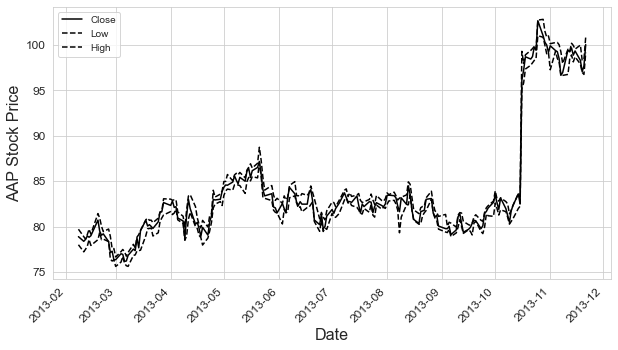

In [5]:
# Plot the first 200 observations of the training data to see the trend 

plt.figure(figsize=(10,5))

plt.plot(data_aap_train['date'].values[:200],
            data_aap_train['close'].values[:200],
            'k-', label='Close')
plt.plot(data_aap_train['date'].values[:200],
            data_aap_train['low'].values[:200],
            'k--', label='Low')
plt.plot(data_aap_train['date'].values[:200],
            data_aap_train['high'].values[:200],
            'k--', label='High')

plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)

plt.xlabel("Date", fontsize=16)
plt.ylabel("AAP Stock Price", fontsize=16)

plt.legend()

plt.show()

From this plot, we see an upward trend for the closing stock price. 

## 4. Baseline Models For Data with Trend but No Seasonality

### a. A Linear Trend Model

In [6]:
# Use Linear Regression to fit the close value against the dates. 

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X = np.arange(1, len(data_aap_train) + 1).reshape(-1, 1)
y = data_aap_train.close

reg.fit(X, y)

LinearRegression()

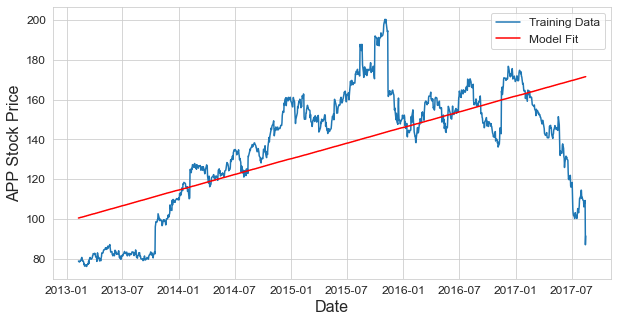

In [7]:
plt.figure(figsize=(10,5))

plt.plot(data_aap_train.date,
            data_aap_train.close,
            label="Training Data")

plt.plot(data_aap_train.date,
            reg.predict(X),
            "r",
            label="Model Fit")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.xlabel("Date", fontsize=16)
plt.ylabel("APP Stock Price", fontsize=16)

plt.show()

In [12]:
# MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(data_aap_train.close,
                      reg.predict(X))

508.59313012353005

The MSE is large for Linear Regression, so we look for some other models that incur fewer errors.

### b. A Random Walk with Drift

In [9]:
beta_hat = (data_aap_train.close.values[-1] - data_aap_train.close.values[0])/len(data_aap_train)
sigma = np.sqrt(((data_aap_train.close.diff() - beta_hat)**2).sum()/len(data_aap_train))
drift_pred = data_aap_train.close.values[-1] + beta_hat*np.arange(1,len(data_aap_test) + 1)

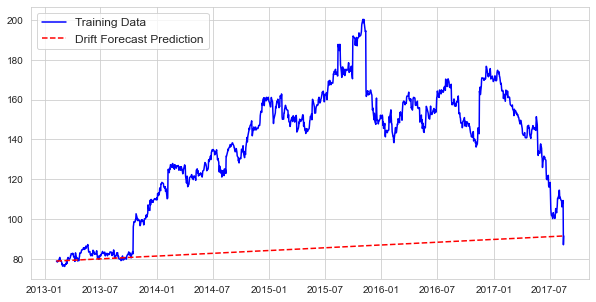

In [10]:
plt.figure(figsize=(10,5))

plt.plot(data_aap_train.date,
            data_aap_train.close,
            'b-',
            label="Training Data")

plt.plot(data_aap_train.date,
            data_aap_train.close.values[0] + beta_hat*data_aap_train.index,
            'r--',
            label="Drift Forecast Prediction")

plt.legend(fontsize=12, loc=2)

plt.show()

In [11]:
# MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(data_aap_train.close,
                      data_aap_train.close.values[0] + beta_hat*data_aap_train.index)

3380.4758355827885